In [50]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("Obesity.csv")

In [72]:
df.loc[df['Gender'] == 'Male', 'Sex'] = 1
df.loc[df['Gender'] == 'Female', 'Sex'] = 0

In [73]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Sex'],
      dtype='object')

In [74]:
df = df.drop(['family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'], axis = 1)

Note: Body Mass Index (BMI) was
calculated dividing weight in kg by (height * height) in metre square

In [75]:
df['BMI'] = df["Weight"]/ (df["Height"] * df["Height"])

Note: Body Fat % = − 44.988 + (0.503 × age) + (10.689 × sex) +
(3.172 × BMI) - (0.026 × BMI2
) + (0.181 × BMI × sex) -
(0.02 × BMI × age) - (0.005 × BMI2
 × sex) + (0.00021 ×
BMI2
 × age), where, BMI = body mass index, male = 0 and
female = 1 for sex

In [76]:
df["body_fat"] = -44.988 + (0.503 * df["Age"]) + (10.689 * df["Sex"]) + (3.172 * df["BMI"]) - (0.026 * df["BMI"] * df["BMI"]) + (0.181 * df["BMI"] * df["Sex"]) - (0.02 * df["BMI"] * df["Age"]) - (0.005 * df["BMI"] * df["BMI"] * df["Sex"]) + (0.00021 * df["BMI"] * df["BMI"] * df["Age"])

In [77]:
df["body_fat"].describe()

count    2111.000000
mean       32.935562
std        12.847703
min        -3.522734
25%        23.285277
50%        35.246980
75%        43.809730
max        56.204440
Name: body_fat, dtype: float64

Note:
The female
subjects whose BMI ≥ 25 kg/m2
 correspond to body fat >
32% were classified into overweight group and BMI < 25
kg/m2
 correspond to body fat ≤ 32% were classified into no
overweight group. Considering BMI ≥ 25 kg/m2
 correspond
to body fat > 23%, the male subjects were classified into
overweight group and BMI < 25 kg/m2
 correspond to body
fat ≤ 23% were classified into no overweight group [10, 15,
16]. 

In [78]:
def overweight_cal(x):
  if x['Gender'] == 'Male' and x['BMI'] >= 25 and x["body_fat"] > 23: return 1
  elif x['Gender'] == 'Male' and x['BMI'] < 25 and x["body_fat"] < 23: return 0
  elif x['Gender'] == 'Female' and x['BMI'] >= 25 and x["body_fat"] > 23: return 1
  else: return 0

df['Overweight'] = df.apply(overweight_cal, axis=1)

In [79]:
df.head(10)

,Gender,Age,Height,Weight,Sex,BMI,body_fat,Overweight
0,Female,21.0,1.62,64.0,0.0,24.386526,19.847090,0
1,Female,21.0,1.52,56.0,0.0,24.238227,19.594656,0
2,Male,23.0,1.80,77.0,1.0,23.765432,31.242690,0
3,Male,27.0,1.80,87.0,1.0,26.851852,36.552773,1
4,Male,22.0,1.78,89.8,1.0,28.342381,38.137551,1
5,Male,29.0,1.62,53.0,1.0,20.195092,26.129653,0
6,Female,23.0,1.50,55.0,0.0,24.444444,20.224605,0
7,Male,22.0,1.64,53.0,1.0,19.705532,23.925651,0
8,Male,24.0,1.78,64.0,1.0,20.199470,25.213914,0
9,Male,22.0,1.72,68.0,1.0,22.985398,29.786157,0


Pearson's correlation coefficient was used to determine the
relationship between BMI and BF% with the continuous
explanatory variables

In [80]:
df.corr(method = 'pearson')

,Age,Height,Weight,Sex,BMI,body_fat,Overweight
Age,1.000000,-0.025958,0.202560,0.048394,0.244163,0.316694,0.370772
Height,-0.025958,1.000000,0.463136,0.618466,0.131785,0.393595,0.161323
Weight,0.202560,0.463136,1.000000,0.161668,0.934806,0.899336,0.725173
Sex,0.048394,0.618466,0.161668,1.000000,-0.053035,0.439351,0.167145
BMI,0.244163,0.131785,0.934806,-0.053035,1.000000,0.863272,0.759360
body_fat,0.316694,0.393595,0.899336,0.439351,0.863272,1.000000,0.805089
Overweight,0.370772,0.161323,0.725173,0.167145,0.759360,0.805089,1.000000


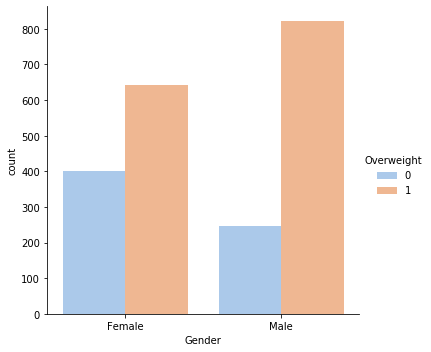

In [95]:
import seaborn as sns
sns.catplot(x = "Gender", hue = "Overweight", kind="count",
            palette = "pastel", data = df)

Chi square test between overweight and gender

In [98]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [99]:
import researchpy as rp
import scipy.stats as stats
rp.summary_cat(df[["Gender", "Overweight"]])

,Variable,Outcome,Count,Percent
0,Gender,Male,1068,50.59
1,,Female,1043,49.41
2,Overweight,1,1464,69.35
3,,0,647,30.65


In [100]:
crosstab = pd.crosstab(df["Gender"], df["Overweight"])

crosstab

Overweight,0,1
Gender,,
Female,401,642
Male,246,822


In [101]:
stats.chi2_contingency(crosstab)

(58.25336309755055,
 2.304427005959004e-14,
 1,
 array([[319.66887731, 723.33112269],
        [327.33112269, 740.66887731]]))

In [102]:
crosstab, test_results, expected = rp.crosstab(df["Gender"], df["Overweight"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

Overweight               
Overweight          0      1     All
Gender                              
Female          19.00  30.41   49.41
Male            11.65  38.94   50.59
All             30.65  69.35  100.00

In [103]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,58.9763
1,p-value =,0.0000
2,Cramer's phi =,0.1671
